<a href="https://colab.research.google.com/github/riyaprakash7827-del/ML-practice/blob/main/Logistic_Regression_Part_2_ML_day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification problem using Logistic Regression

In [ ]:
# Flower Species classify
# Disease classification
# Image Classification
# Multiple Class
# news: Fake vs original(Binary)
# Spam : Mail: (yes vs No): Binary
# Mail: Different Class ko predict: primary, Updates, Social, Promotional, Spam

In [ ]:
# Flower Species: Iris
#
# Sepal_length, Sepal_width, petal_length, petal_width
# 3.1, 2.5, 0.5,1.2 = [versicolor, setosa, verginica], 0,1,2

# ML Algo: Code Model: 4 input: output : Species

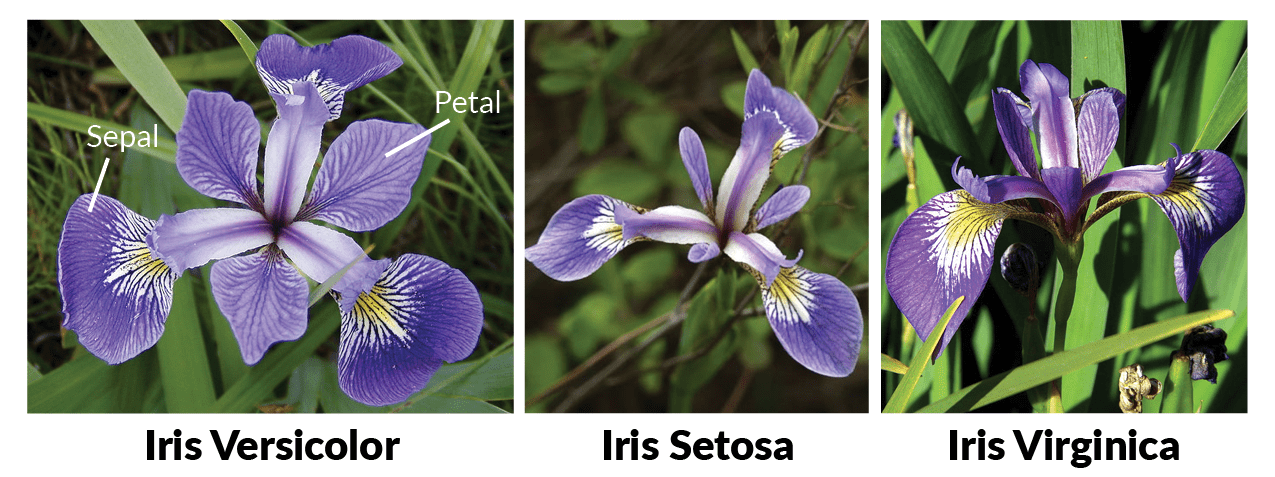

# Step 1 import important modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import os
import warnings
warnings.filterwarnings('ignore')
print('All Module Loaded Successfully!!')

All Module Loaded Successfully!!


# Step 2: Load Dataset

In [ ]:
dataset  = load_iris()
print('Done')

Done


In [ ]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# type(dataset)
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(dataset['DESCR'])

# Imbalance: pass 90, fail: 10
# Model: biased:
# Maths: Chapter 10: chapter: 1

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
columns = dataset['feature_names']
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
dataset['target_names']
# 0,1,2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df = pd.DataFrame(dataset['data'],columns = columns)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['class'] = dataset['target']

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Step 3: EDA

In [ ]:
df.shape

(150, 5)

In [ ]:
df.size

750

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
class,0


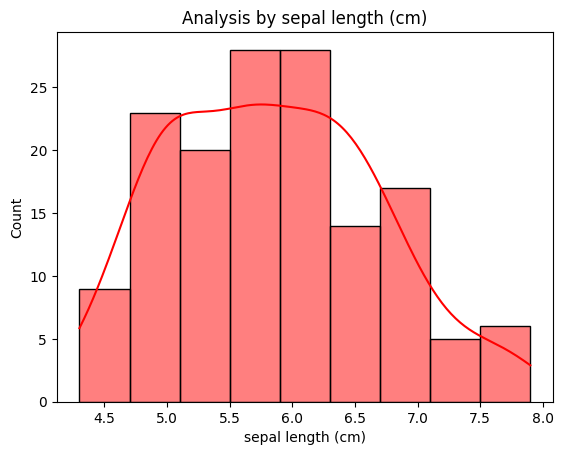

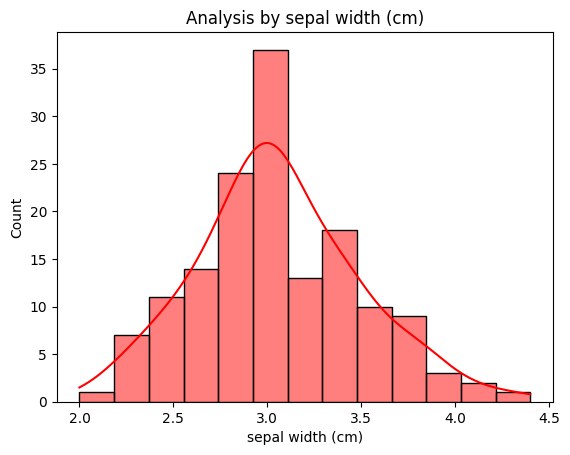

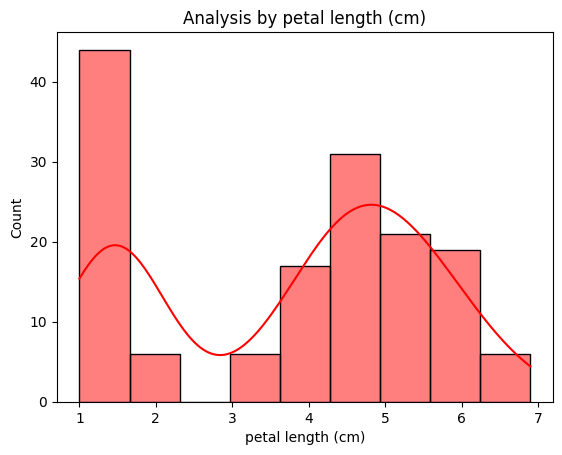

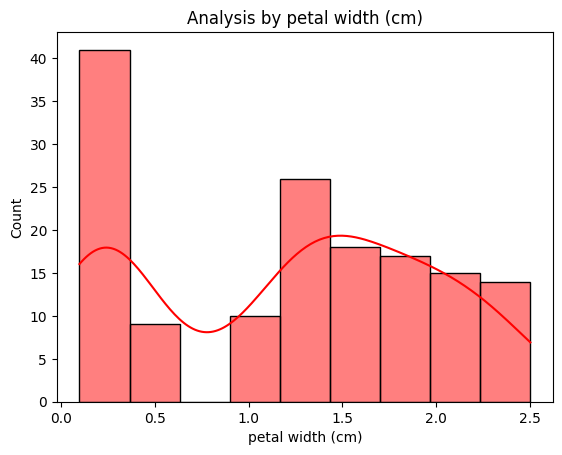

In [ ]:
for i in df.iloc[:,:-1]:
  plt.title(f'Analysis by {i}')
  sns.histplot(data = df, x = i, color = 'r', kde = True)
  plt.show()

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


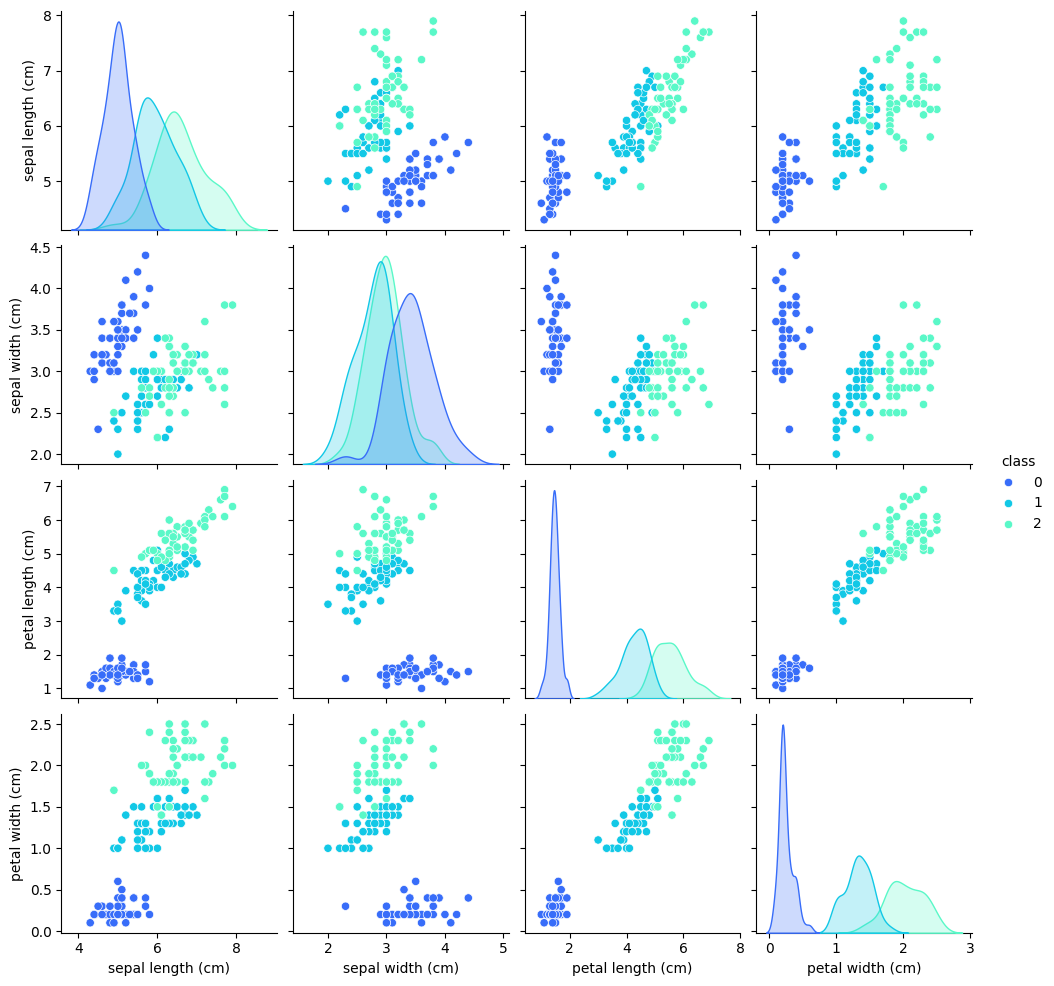

In [ ]:
sns.pairplot(data = df, hue = 'class', palette= sns.color_palette('rainbow'))
plt.show()

# Step 4: Divide Dataset into features vs target

In [ ]:
X =  df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)
print('Done')

Done


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


# Step 5: Model Building

In [ ]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# predict
y_pred = model.predict(X_test)

In [ ]:
# original y: y_test
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
#  Model Score

# Training Score
model.score(X_train,y_train)

0.975

In [ ]:
#  Testing Score
model.score(X_test,y_test)

1.0

In [ ]:
# Hyperparameter Tunning

# Step 6: Model Evaluation

In [ ]:
# Regression problem
# MSE, MAE, RMSE, SCORE, p_value, statsmodel_summary, Model score, R2 Score

# Classification problem
# Binary, Multiclass
# Metrices: accuracy, precision, recall, sensitivity, specificity, Model Score, F1 Score
# Type 1 eror, Type 2 error, confusion matrix, classification report

In [ ]:
# Binary class Confusion matrix
# ML Model---> Predict patient Cancer yes vs No

# Actual Scenario vs Model prediction
# 1 Patient actual: cancer yes  , Model : cancer yes  --->[No Mistake]
# 2 Patient actual: cancer yes  , Model : cancer NO  --->[yes Mistake]: Type 1 Error
# 3 Patient actual: cancer NO  , Model : cancer yes  --->[yes Mistake]: Type 2 Error
# 4 Patient actual: cancer NO  , Model : cancer NO  --->[No Mistake]

# If ML model Score tie: we will select ML which has Type 1 Error: lowest


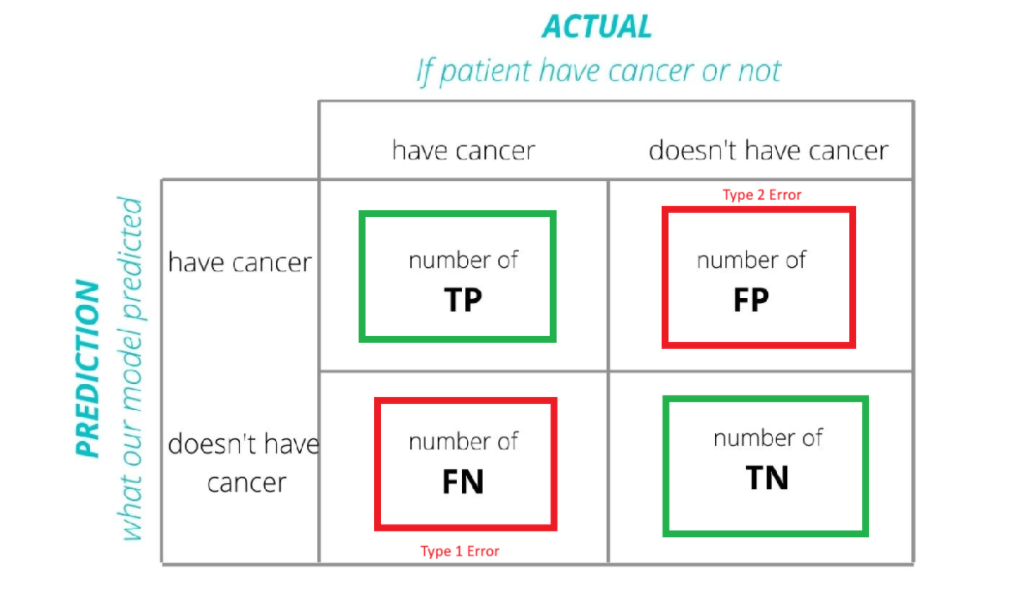